In [202]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from __future__ import division
import sys
from collections import defaultdict
import random
from pprint import pprint
import numpy as np
import math
from collections import Counter

In [246]:
features, labels = make_blobs(n_samples = 35000,
                  # two feature variables,
                  n_features = 2,
                  # four clusters,
                  centers = 4,
                  # with .65 cluster standard deviation,
                  cluster_std = 0.8,
                  # shuffled,
                  shuffle = True)

data = {}
for i in range(len(features)):
    data[tuple(features[i])] = labels[i]

In [247]:
#data[tuple(features[0])]=labels[0]
#data[tuple(features[0])]
#labels[0] 
data[tuple(features[0])]
np.unique(labels)

array([0, 1, 2, 3])

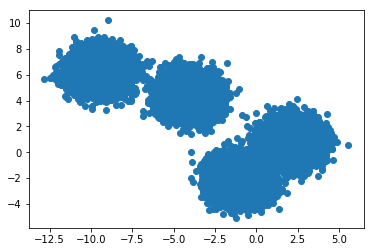

In [248]:
 #Create a scatterplot of first two features
plt.scatter(features[:,0],
            features[:,1])

# View scatterplot
plt.show()

In [147]:
def euclidean(p1,p2):
    distance = np.linalg.norm(p1-p2)
    return distance    

In [148]:
def selectiveRandomCentroids(features,labels):
    features_index = np.array(range(0,len(features)))
    unique_labels = np.unique(labels)
    rand = []
    for n in unique_labels:
        rand.append(features[np.random.choice(features_index[labels==n])])
    #d = dict(zip(unique_labels,rand))
    return rand

In [149]:
def randomCentroids(features,k):
    centroids = features[np.random.choice(features.shape[0], k, replace=False), :]
    return centroids

In [150]:
#euclidean(features[0],features[1])
#randomCentroids(features,4)
#new_centers = defaultdict(int)
#new_centers[0]+=features[0]
#new_centers[0]+=features[1]
#new_centers
centroids = randomCentroids(features,4)
point = features[0]
distances = [0 for x in range(len(centroids))]
for i in range(len(centroids)):
    distances[i] = euclidean(point,centroids[i])
print(distances)
minIndex = distances.index(min(distances))
print(minIndex)
#best = min(randomCentroids(features,4), key=lambda c: euclidean(features[0],c))
#centroids[0]
#assignments = assignClusters(features,centroids,labels)
#data = assignments[0]
#mean = sum(data)/len(data)

# Calculate sum of square of difference
# of data points from mean
#dev = 0
#for rec in data:
 #   dev += pow((rec - mean),2)

# Calculate variance
#var = dev/len(data)
#std_dev = np.sqrt(var)
#dp = features[0]
#distances = [0 for x in range(len(centroids))]
#for i in range(len(centroids)):
#    distances[i] = euclidean(dp,centroids[i])
    
#len(checkIfClose(distances)) 
    
#distance = np.sqrt(np.square(dp-centroids[0]))
#print(np.mean(np.divide(distance,std_dev)))
#print(distance)
#print(std_dev)
#print(dp)
#calculateStdDev(centroids[0],data,dp)


# Calculate standard deviation
#std_dev = math.sqrt(var)
#assignments[0][0]
#print(centroids[0])
#type(assignments[0][0])
#np.divide(features[0],2,dtype = float)
#features[0]
#updateCentroids(assignments)
#d = selectiveRandomCentroids(features,labels,4)
#knn(4515,features,labels,5)
newCentroids = np.zeros(shape=(4,3))
newCentroids



[8.029231366534908, 12.979025948672284, 1.6943368725016892, 8.545931308943157]
2


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [225]:
def knnImpl(index,features,n,data):
    dist = {}
    point = features[index]
    for i in range(len(features)):
        if(i!=index):
            dist[tuple(features[i])] = euclidean(features[i],point)
    sorted_dist = sorted(dist.items(), key=lambda kv: kv[1])   
    clus = [0 for x in range(n)]
    for i in range(n):
        dp = sorted_dist[i][0]
        clus[i] = data[dp]
    counter = Counter(clus)
    return counter.most_common()[0][0]
            

In [257]:
def assignClustersKNN(features,centroids,labels,data):
    assignments = defaultdict(list)
    distances = [[0 for x in range(len(centroids))] for y in range(len(features))]
    count=0
    for i in range(len(features)):
        #minDist = euclidean(features[i],centroids[0])
        #minIndex = 0
        for j in range(0,len(centroids)):
            distances[i][j] = euclidean(features[i],centroids[j])
            #dist = euclidean(features[i],centroids[j])
            #if(dist<minDist):
            #    minDist = dist
            #    minIndex = j        
        near = checkIfClose(distances[i])
        #print(near)
        if len(near)==1:
            clusterAssigned = distances[i].index(min(distances[i]))
        else:
            count = count+1
            clusterAssigned = knn(i,features,labels,5)#knnImpl(i,features,5,data)#distances[i].index(min(distances[i]))
        assignments[clusterAssigned].append(features[i])    
    print(count)
    return assignments    
    

In [199]:
def assignClustersStDev(features,centroids,labels):
    assignments = defaultdict(list)
    distances = [[0 for x in range(len(centroids))] for y in range(len(features))]
    count = 0
    for i in range(len(features)):
        #minDist = euclidean(features[i],centroids[0])
        #minIndex = 0
        for j in range(0,len(centroids)):
            distances[i][j] = euclidean(features[i],centroids[j])
            #dist = euclidean(features[i],centroids[j])
            #if(dist<minDist):
            #    minDist = dist
            #    minIndex = j        
        near = checkIfClose(distances[i])
        #print(near)
        if len(near)==1:
            clusterAssigned = distances[i].index(min(distances[i]))
        else:
            minCluster = distances[i].index(min(distances[i]))
            nextCluster = near[1]
            pivot = (len(features)/4)*0.1
            if len(assignments[minCluster])>pivot and len(assignments[nextCluster])>pivot:
                count=count+1
                minDev = calculateStdDev(centroids[minCluster],assignments[minCluster],features[i])
                nextDev = calculateStdDev(centroids[nextCluster],assignments[nextCluster],features[i])
                if(minDev<=nextDev):
                    clusterAssigned = minCluster
                else:
                    clusterAssigned = nextCluster
            else:
                clusterAssigned = minCluster
                
            #print(near)
            #clusterAssigned = distances[i].index(min(distances[i]))#knn(i,features,labels,5)
        assignments[clusterAssigned].append(features[i])    
    print(count)
    return assignments    


In [154]:
def calculateStdDev(centroid,cluster,point):
    mean = sum(cluster)/len(cluster)
    dev = 0
    for rec in cluster:
        dev += pow((rec - mean),2)
    var = dev/len(cluster)
    std_dev = np.sqrt(var)
    distance = np.sqrt(np.square(point-centroid))
    numDev = np.mean(np.divide(distance,std_dev))
    return numDev

In [227]:
def checkIfClose(distances):
    minElement = min(distances)
    #distances[:] = [x - minElement for x in distances]
    for i in range(len(distances)):
        if distances[i]!=minElement and distances[i]<=1.1*minElement:
            return [True,i]
        else:
            return [False]

In [156]:
def updateCentroids(assignments):
    newCentroids = np.zeros(shape=(len(assignments.keys()),2))
    for i in assignments.keys():
        clusterMembers = assignments[i]
        #print(clusterMembers[0])
        newCentroids[i] = np.mean(clusterMembers,axis=0)
        #curCentroidSum = sum(clusterMembers[0],clusterMembers[1])
        #for j in range(2,len(clusterMembers)):
        #    curCentroidSum = sum(curCentroidSum,clusterMembers[j])
        #newCentroids[i] = np.divide(curCentroidSum,len(clusterMembers))
    return newCentroids    

In [259]:
def kmeans(initialCentroids,features,labels,data,k,maxIter):
    centroids = initialCentroids
    for i in range(maxIter):
        print("Iteration number: "+str(i))
        newClusters = assignClustersStDev(features,centroids,labels)
        print(type(newClusters[0]))
        newCentroids = updateCentroids(newClusters)   
        print("************")
        print(newCentroids)
        print(centroids)
        print("************")
        if(np.array_equal(newCentroids,centroids)):
            break
        else:
            centroids = newCentroids
    return newClusters       

In [255]:
centroids = randomCentroids(features,4)

In [260]:
assign = kmeans(centroids,features,labels,data,4,100)

Iteration number: 0
992
<class 'list'>
************
[[-7.27129793  5.58363928]
 [-3.13657989  0.51520062]
 [-1.21319566 -2.62818916]
 [ 0.82877418  0.36771782]]
[[-9.99970737  5.71205252]
 [-2.15560065 -1.9436407 ]
 [-1.63689836 -2.05985888]
 [-0.87541293 -1.41025867]]
************
Iteration number: 1
566
<class 'list'>
************
[[-7.29760558  5.60883429]
 [-3.34554913  3.21268156]
 [-0.9914102  -2.16335323]
 [ 2.02280887  0.68005229]]
[[-7.27129793  5.58363928]
 [-3.13657989  0.51520062]
 [-1.21319566 -2.62818916]
 [ 0.82877418  0.36771782]]
************
Iteration number: 2
205
<class 'list'>
************
[[-9.02266523  6.16459558]
 [-3.91369974  4.26791584]
 [-0.96842718 -2.03303547]
 [ 2.15562735  0.77408848]]
[[-7.29760558  5.60883429]
 [-3.34554913  3.21268156]
 [-0.9914102  -2.16335323]
 [ 2.02280887  0.68005229]]
************
Iteration number: 3
2
<class 'list'>
************
[[-9.43551682  6.27463639]
 [-4.05211625  4.36429424]
 [-0.96329207 -2.02440992]
 [ 2.16345039  0.779

In [262]:
kmeansimp.cluster_centers_

array([[-4.05376203,  4.36505183],
       [-9.43756256,  6.27518872],
       [-0.96287488, -2.02415882],
       [ 2.16374776,  0.78012624]])

In [ ]:
[[-7.572967   -2.76480614]
 [ 3.77271674  0.73889065]
 [ 9.79553375  8.76190471]
 [ 9.12735302  7.68126672]]
[[-7.572967   -2.76480614]
 [ 3.77271674  0.73889065]
 [ 9.79553375  8.76190471]
 [ 9.12735302  7.68126672]]

[[-8.56239888  0.63339448]
 [ 3.77271674  0.73889065]
 [-6.58353511 -6.16300675]
 [ 9.44869068  8.20096097]]
[[-8.56239888  0.63339448]
 [ 3.77271674  0.73889065]
 [-6.58353511 -6.16300675]
 [ 9.44869068  8.20096097]]

In [264]:
assign.keys()

dict_keys([3, 1, 0, 2])

In [263]:
data[tuple(features[0])]

1

In [265]:
count = 0
for i in assign.keys():
    cluster = assign[i]
    for item in cluster:
        if data[tuple(item)]!=i:
            count = count+1
print(count)    

35000


In [261]:
from sklearn.cluster import KMeans
kmeansimp = KMeans(n_clusters=4, random_state=0).fit(features)